In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import math 

## Ejercicio 1 - Transformada de Fourier y Representacion Frecuencial

Usando las propriedades de la Transformada de Fourier calcule la transformada de las siguiente senales. Grafique
la senal x y el modulo de su transformada $|\hat x|$ :

Definimos las señales indicadas:

1. $x(t)=2\sin(\omega_0t)$

Usando la escritura de seno con exponenciales complejas, si $x(t) = 2\sin(\omega_0t) =  i{e^{-i\omega_0t}-ie^{i\omega_0t}}$, se sigue


$$\hat x(\omega) = \frac{2 \pi}{i}  \left( \delta(\omega-\omega_0) - \delta(\omega+\omega_0)   \right)  $$

y luego

$$|\hat x(\omega)| = 2\pi \left( \delta(\omega-\omega_0) + \delta(\omega+\omega_0)  \right). $$


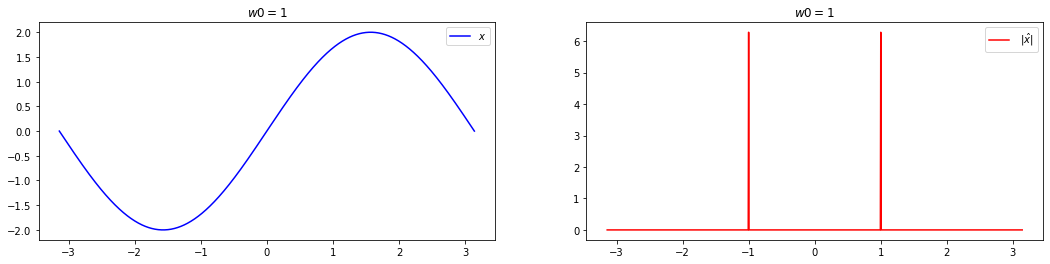

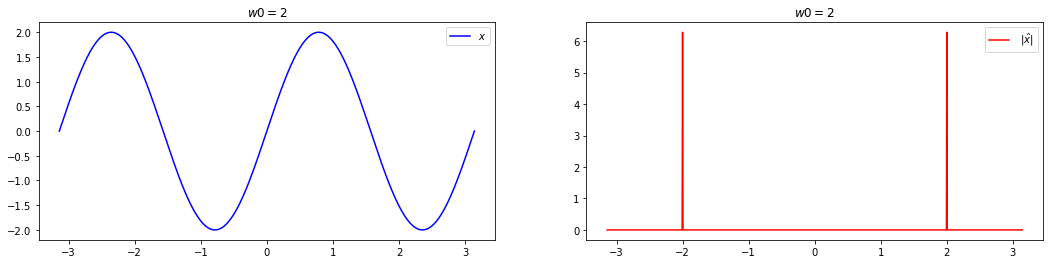

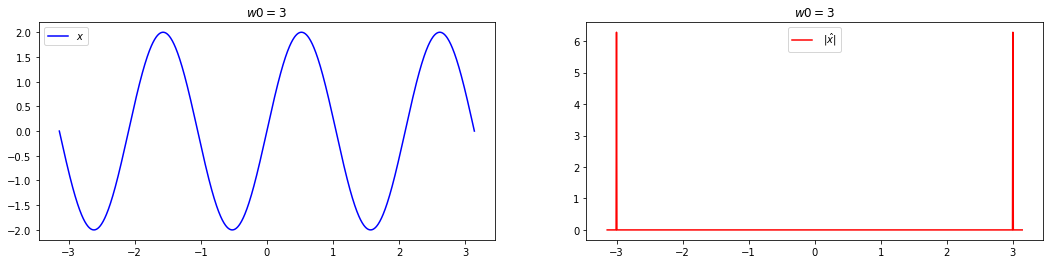

In [183]:
#definimos constantes y algunas variables
N = 2**10 + 1 # 1025
L = np.pi 
t = np.linspace(-L, L, N)

w = np.copy(t) 
omega = np.copy(t) 
for w0 in [1,2,3]:
    x=2*np.sin(w0*t)
    n_w0 = int((L+w0) * N/(2*L))
    minus_n_w0 = int((L-w0) * N/(2*L))
    xhatmod = 2*np.pi*(signal.unit_impulse(N, n_w0) + signal.unit_impulse(N, minus_n_w0))

    fig, ax = plt.subplots(1, 2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-',  label='$x$')
    o2 = ax[1].plot(w, xhatmod, 'r-', label=' |$\hat{x}$|')
    ax[0].legend();
    ax[1].legend();
    ax[0].set_title(f'$w0 = {w0}$')
    ax[1].set_title(f'$w0 = {w0}$')


 2. $x(t)=2\sin(2\omega_0t+2/3)$

Usando la escritura de seno con exponenciales complejas, si $x(t) = 2\sin(2\omega_0t+2/3) =  i{e^{-2i\omega_0t-2i/3}-ie^{2i\omega_0t+2i/3}}$,asi:

$$\hat x(\omega) = {2i \pi}  \left( e^{-2i/3}\delta(\omega-2\omega_0) - e^{2i/3}\delta(\omega+2\omega_0)   \right),  $$

y luego

$$|\hat x(\omega)| = 2\pi \left( \delta(\omega-2\omega_0) + \delta(\omega+2\omega_0)  \right). $$


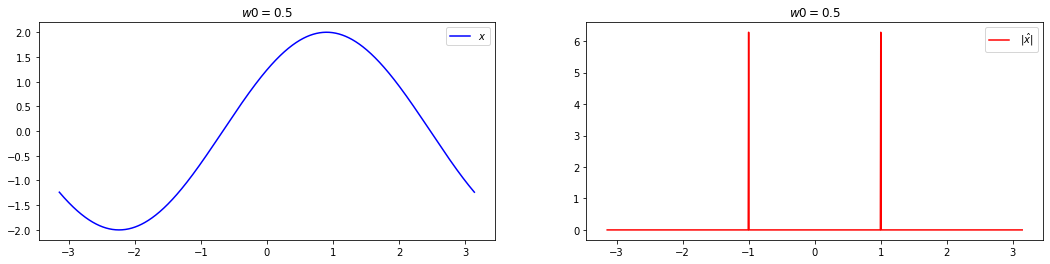

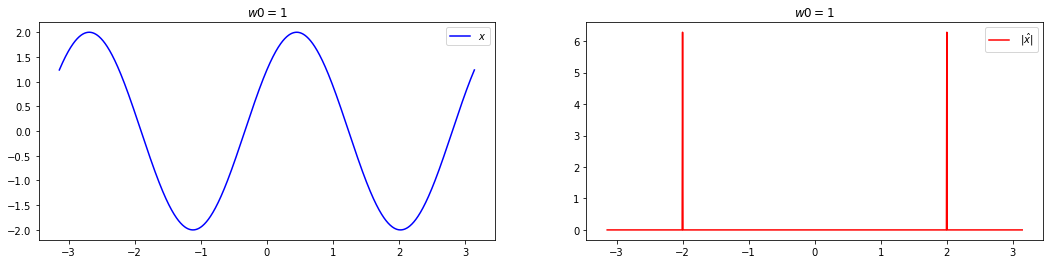

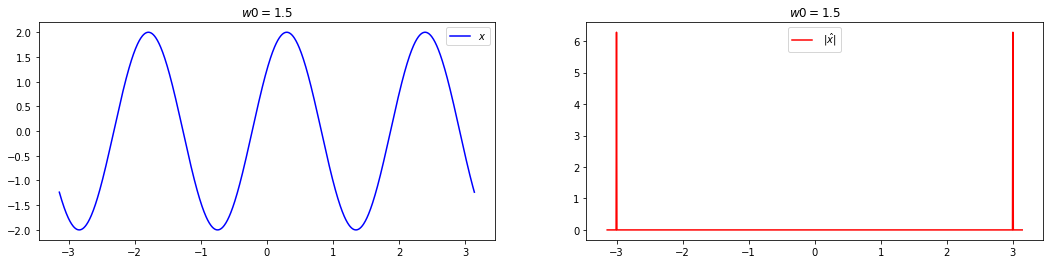

In [206]:
for w0 in [0.5,1,1.5]:
    x=2*np.sin(2*w0*t+2/3)
    n_w0 = int((L+2*w0) * N/(2*L))
    minus_n_w0 = int((L-2*w0) * N/(2*L))
    xhatmod = 2*np.pi*(signal.unit_impulse(N, n_w0) + signal.unit_impulse(N, minus_n_w0))

    fig, ax = plt.subplots(1, 2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-',  label='$x$')
    o2 = ax[1].plot(w, xhatmod, 'r-', label=' |$\hat{x}$|')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$w0 = {w0}$')
    ax[1].set_title(f'$w0 = {w0}$')



3. $x(t)=2\cos(\omega_0t)+\sin(\omega_0t)$

Usando la escritura de seno y el coseno con exponenciales complejas, si $$x(t) = 2\cos(\omega_0t)+\sin(\omega_0t) = \left(\dfrac{i}{2}+1\right)e^{-it\omega_0}+\left(-\dfrac{i}{2}+1\right)e^{it\omega_0} \\ $$ 
se sigue:

$$\hat x(\omega) = 2 \pi\left((i+2)  \delta(\omega - \omega_o) + (-i+2)  \delta(\omega + \omega_0) \right), $$

asi:

$$|\hat x(\omega)| = 2 \pi\sqrt{5}\left(  \delta(\omega - \omega_o) +   \delta(\omega + \omega_0) \right). $$


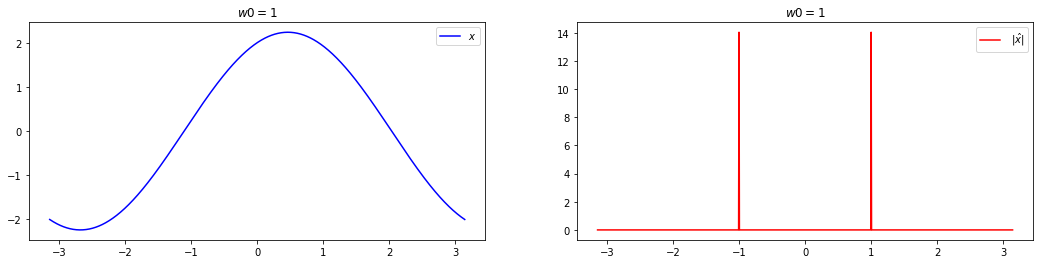

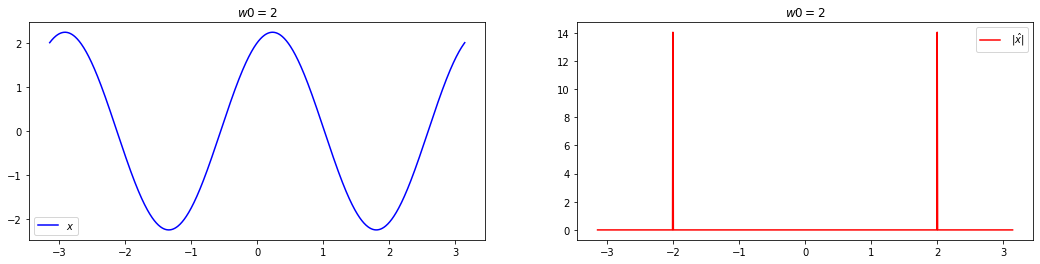

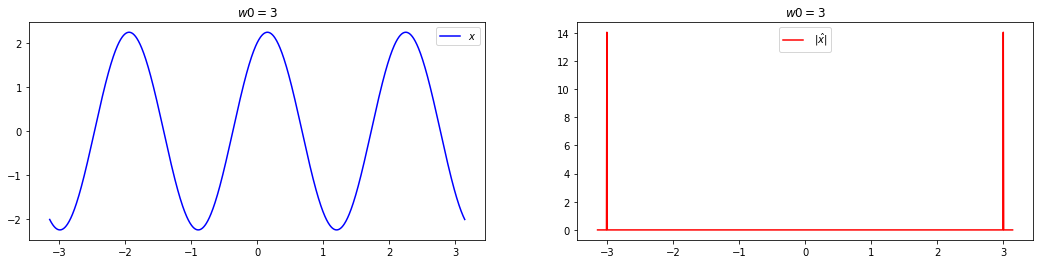

In [198]:
for w0 in [1,2,3]:
    x = 2*np.cos(w0*t)+np.sin(w0*t)
    n_w0 = int((L+w0) * N/(2*L))
    minus_n_w0 = int((L-w0) * N/(2*L))
    xhatmod = 2*np.pi*math.sqrt(5)*(signal.unit_impulse(N, n_w0) + signal.unit_impulse(N, minus_n_w0))

    fig, ax = plt.subplots(1, 2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-',  label='$x$')
    o2 = ax[1].plot(w, xhatmod, 'r-', label=' |$\hat{x}$|')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$w0 = {w0}$')
    ax[1].set_title(f'$w0 = {w0}$')



4. $x(t)=1$

Directamente:

$$\hat x(\omega) = 2 \pi\delta(\omega), $$

asi:

$$|\hat x(\omega)| = 2 \pi\delta(\omega). $$
Con esto definimos gráficamos:

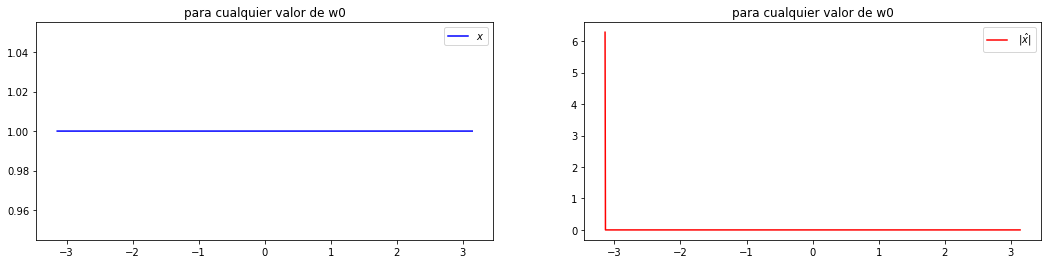

In [203]:
x = np.linspace(-L, L, N)-np.linspace(-L, L, N)+1
xhatmod = 2*np.pi*(signal.unit_impulse(N, 0))

fig, ax = plt.subplots(1, 2,figsize=(18,4))
o1 = ax[0].plot(t, x, 'b-',  label='$x$')
o2 = ax[1].plot(w, xhatmod, 'r-', label=' |$\hat{x}$|')
ax[0].legend();
ax[1].legend();
ax[0].set_title('para cualquier valor de w0');
ax[1].set_title('para cualquier valor de w0');

## Ejercicio 2 - Calculo de la Transformada de Fourier

1. $x(t) = e^{-at}\gamma(t)$, con $a>0$

y su transformada de Fourier viene dada por:

\begin{eqnarray}
  \hat x(\omega) &=& \int_0^\infty e^{-at} e^{-i \omega t} dt,  \\
                 &=& \int_0^\infty e^{-(a +i \omega) t} dt, \\
                 &=& \left. \frac{e^{-(a +i \omega) t}}{-(a +i \omega)} \right|_0^\infty, \\
                 &=&  \frac{1}{(a +i \omega)}.
\end{eqnarray}  


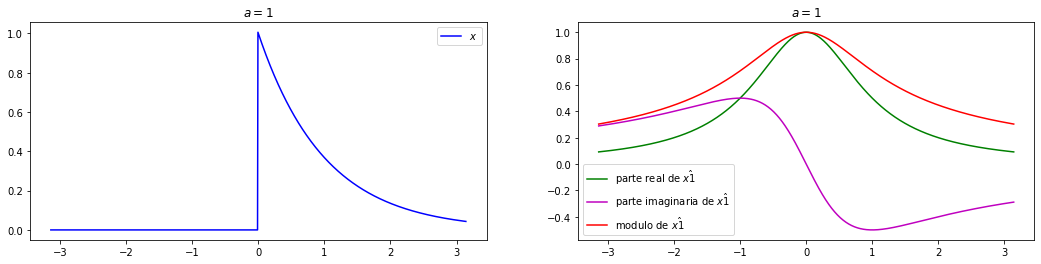

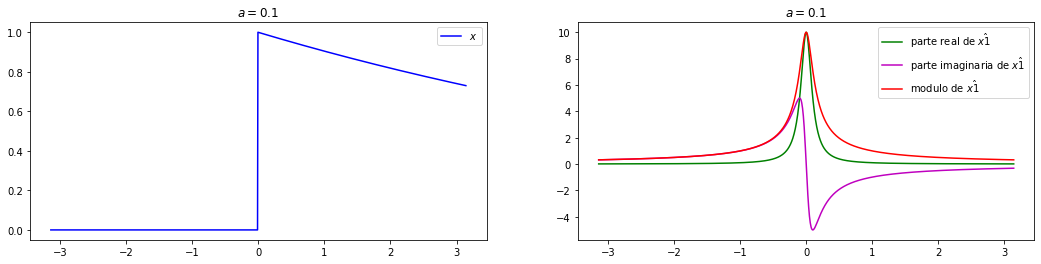

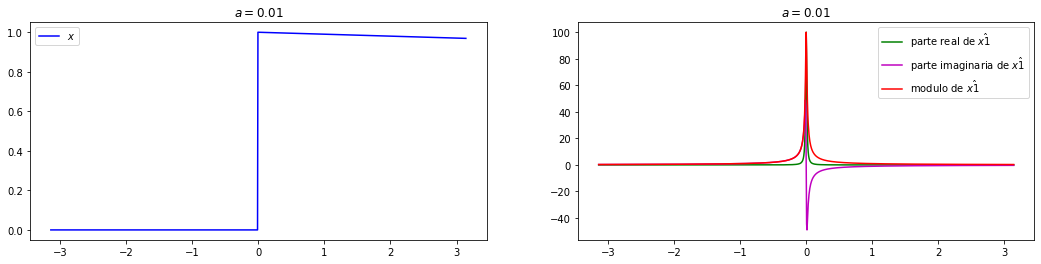

In [155]:
for a in [1, .1, .01]:
    
    x1 = np.exp(-a*t) 
    x1[:int(N/2)-1] = 0
    xhat = 1/(a+1j*omega)

    fig, ax = plt.subplots(1,2,figsize=(18,4))
    o1 = ax[0].plot(t, x1, 'b-', label='$x$')
    o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\hat{x1}$')
    o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\hat{x1}$')
    o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\hat{x1}$')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$a = {a}$')
    ax[1].set_title(f'$a = {a}$')

2. $x(t) = e^{-a|t|}$, con $a>0$

y su transformada de Fourier viene dada por:

\begin{eqnarray}
  \hat x(\omega) &=& \int_{-\infty}^\infty e^{-a|t|} e^{-i \omega t} dt,  \\
                 &=& \int_{-\infty}^0 e^{at} e^{-i \omega t} dt+ & \int_0^\infty e^{-at} e^{-i \omega t} dt, \\
                 &=& \left. \frac{e^{(a -i \omega) t}}{(a - i\omega)} \right|_{-\infty}^0+& \left.\frac{e^{-(a +i \omega) t}}{-(a +i \omega)} \right|_0^\infty \\
                 &=&  \frac{1}{(a -i\omega)}+\frac{1}{(a +i\omega)} \\
                 &=&  \frac{2a}{(a^2+ \omega^2)}
\end{eqnarray}  

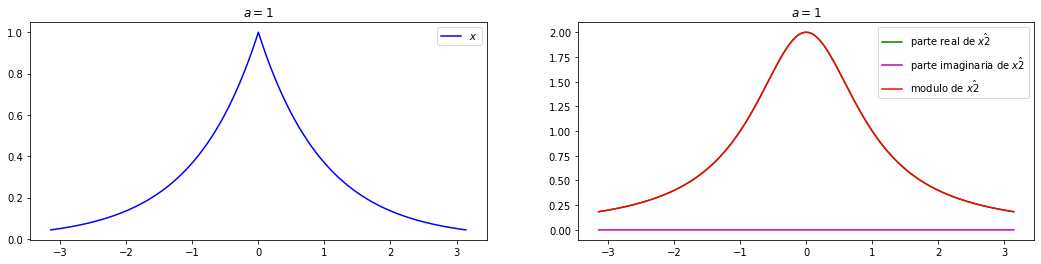

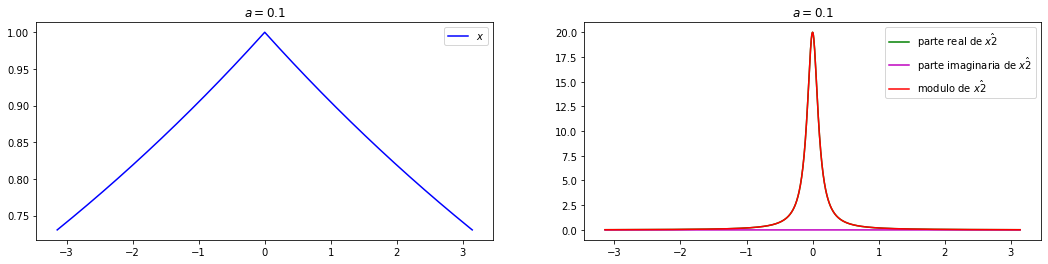

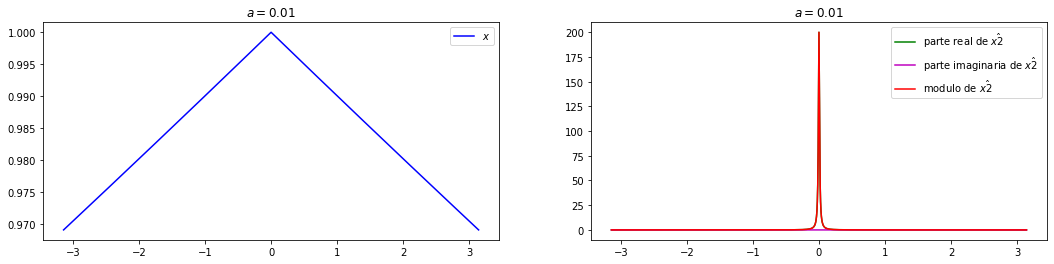

In [156]:
for a in [1, .1, .01]:
    
    x2 = np.exp(-a*abs(t)) 
    xhat = 2*a/(a**2+omega**2)

    fig, ax = plt.subplots(1,2,figsize=(18,4))
    o1 = ax[0].plot(t, x2, 'b-', label='$x$')
    o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\hat{x2}$')
    o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\hat{x2}$')
    o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\hat{x2}$')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$a = {a}$')
    ax[1].set_title(f'$a = {a}$')
    

3. $x(t) = \frac{1}{1+t^2}$

Ocupando el calculo anterior con a=1 y dividiendo la funcion por 2, más las propiedades de la transformada inversa se llega a lo siguiente:
$$
\dfrac{e^{-|t|}}{2}=\int_{-\infty}^{\infty} \dfrac{e^{-i\omega t}}{1+\omega^2}d\omega
$$
Por lo tanto: 
$$
\hat{x}(\omega)=\dfrac{e^{-|\omega|}}{2}
$$
Ahora procedemos a graficar la señal y los módulos.

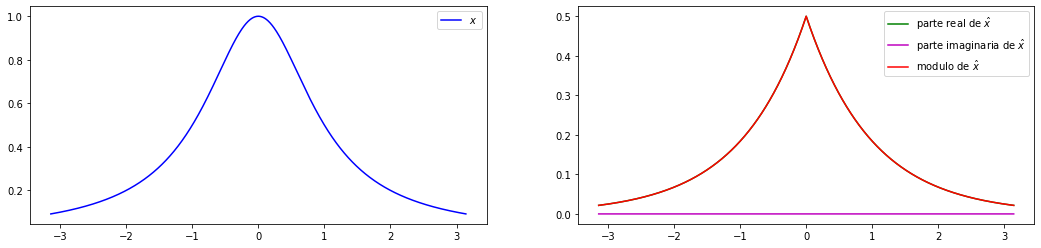

In [213]:
x = 1/(1+t**2) 
xhat = np.exp(-np.abs(omega))/2
fig, ax = plt.subplots(1,2,figsize=(18,4))
o1 = ax[0].plot(t, x, 'b-', label='$x$')
o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\hat{x}$')
o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\hat{x}$')
o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\hat{x}$')
ax[0].legend();
ax[1].legend();

4. $x(t) = \frac{1}{2-2t-t^2}$

\begin{eqnarray}
\mathscr{F}(x(t)) &=&\mathscr{F}\left( \dfrac{1}{2-2t+t^2} \right) \\
&=& \mathscr{F}\left( \dfrac{1}{(t-1)^2+1} \right) \\
&=&e^{-i\omega}\mathscr{F}\left( \dfrac{1}{t^2+1} \right)\\
&=& \dfrac{e^{-i \omega} e^{-|\omega|}}{2}
\end{eqnarray}

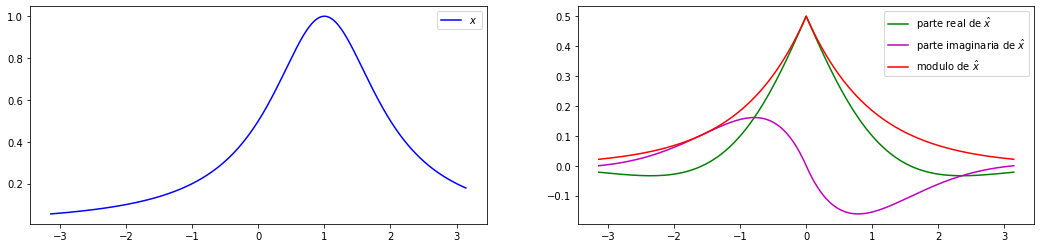

In [217]:
x = 1/((t-1)**2+1) 
xhat = np.exp(-1j*omega-np.abs(omega))/2
fig, ax = plt.subplots(1,2,figsize=(18,4))
o1 = ax[0].plot(t, x, 'b-', label='$x$')
o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\hat{x}$')
o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\hat{x}$')
o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\hat{x}$')
ax[0].legend();
ax[1].legend();

## Ejercicio 3 - Filtro medio

El filtro medio, parametrizado por T > 0, calcula el promedio de la señal en una ventana deslizante de largo $T$.
Su respuesta impulsional es la la función rectangular definida por:
$$
h(t)=\Pi_T(t-T/2)
$$

1.- Grafique la respuesta impulsional y determine si es casual


 $$
 h(t)=\Pi_T(t-T/2)= \left\{ \begin{array}{lcc}
             1/T &   si  & 0 < t < T \\
             \\ 1/2T &  si & t=0\ o \ t=T \\
             \\ 0 &  \   & \text{e.o.c}
             \end{array}
   \right.
 $$

In [225]:
N = 8*2**10 + 1 # 1025
L = 4*np.pi 

t = np.linspace(-L, L, N)
w = t

T = np.pi/2

h = np.zeros_like(t)

n_zero = int(N/2)-1
n_min = n_zero - int(T * N/(2*L))
n_max = n_zero + int(T * N/(2*L))
h[n_zero+1:n_T-1] = 1/T
h[n_zero] = 1/(2*T)
h[n_T] = 1/T

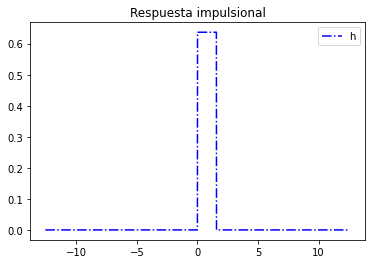

In [226]:
plt.plot(t,h,'b-.',label = 'h')
plt.legend()
plt.title('Respuesta impulsional');

2.- Calcule la salida del sistema lineal correspondiente, cuando la entrada es:

a. $x(t) = 1$

Calculando:

$\mathcal{L}[1](t) = \displaystyle\int_{-\infty}^{+\infty}1\cdot h(u)du = \displaystyle\int_{0}^{T}\dfrac{1}{T}dt = 1$

b. $x(t)=\gamma(t)$

Calculando:

$\mathcal{L}[\gamma](t) = \gamma (t)\ast h(t)=\displaystyle\int_{-\infty}^{+\infty}\gamma (t-u)h(u)du = \displaystyle\int_{0}^{T}\dfrac{1}{T}dt = 1 $

c. $x(t)=\cos(\omega_0 t)$

Calculando:

\begin{eqnarray*}
\mathcal{L}[\cos(\omega_0 t)](t) &=& \displaystyle\int_{-\infty}^{+\infty}\cos(\omega_0 (t-u))h(u)du\\
&=& \dfrac{1}{T}\displaystyle\int_{0}^{T} \cos(\omega_0 (t-u))du, \ \ v = \omega_0 (t-u)\\
&=& -\dfrac{1}{\omega_0 T}\displaystyle\int_{\omega_0 t}^{\omega_0 (t-T)}\cos(j)dj\\
&=& \dfrac{1}{\omega_0 T}(\sin(\omega_0 t)-\sin(\omega_0 (t-T)))
\end{eqnarray*}




3.-Exprese la salida del sistema para $x(t) = \cos(\omega_0 t)$ de la forma $y(t) = A(\omega_0) cos(\omega_0 t + \varphi(\omega_0))$.

\begin{eqnarray}
\frac{1}{\omega_0 T}\left(\sin(\omega_0t)-\sin(\omega_0(t-T)) \right)&=&\frac{2}{\omega_0 T}  \cos\left( \frac{\omega_0t+\omega_0(t-T)}{2} \right)\sin\left(\frac{\omega_0t-\omega_0(t-T)}{2} \right), \\
&=&\frac{2}{\omega_0 T} \sin\left( \dfrac{\omega_o T}{2} \right)\cos\left(\omega_0t- \frac{\omega_0T}{2} \right), \\
&=& sinc(\dfrac{\omega_0 T}{2})\cos\left( \omega_0t-\frac{\omega_0T}{2} \right), \\
&=& A(\omega_0)\cos(\omega_0 t + \varphi(\omega_0)).
\end{eqnarray}
Donde se ocupe lo siguiente:

$$
\sin(x)-\sin(y)=2\cos(\dfrac{x+y}{2})\sin(\dfrac{x-y}{2})$$


4.- Grafique $|A(\omega_0)|$ en función de $\omega_0$ para $T = 1$. Grafique también $\varphi(\omega_0)$.

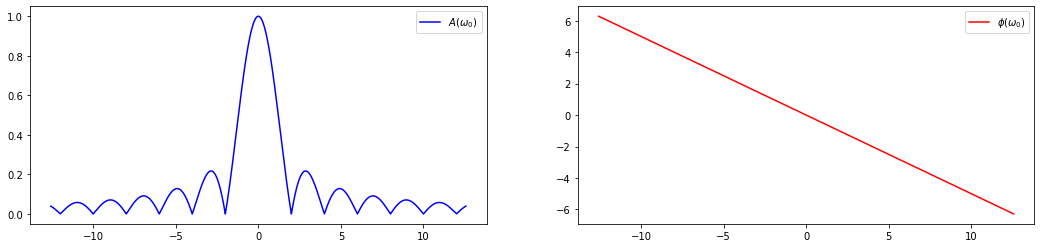

In [229]:
T=1
w0=np.copy(t)
A= np.sinc(w0*T/2)
fi = -w0*T/2
fig, ax = plt.subplots(1,2,figsize=(18,4))
o1 = ax[0].plot(w0,np.abs(A),'b-',label = '$A(\omega_0)$')
o2 = ax[1].plot(w0, fi, 'r-', label='$ \phi(\omega_0) $') 
ax[0].legend()
ax[1].legend();

**5.-** Calcule la función de transferencia  del sistema $H(\omega)$. cuál es la relación con $A(\omega)$ y $\phi(\omega)$?

\begin{eqnarray*}
H(\omega) &=& \displaystyle\int_{-\infty}^{+\infty} h(t)e^{-i\omega t}dt\\
&=& \dfrac{1}{T}\displaystyle\int_{0}^{T}e^{-i\omega t}dt\\
&=& \dfrac{1- e^{-i\omega T}}{T\omega i}\\
&=& \dfrac{1-(\cos(\omega T)-i\sin(\omega T))}{T\omega i}\\
&=& \dfrac{1-\cos(\omega T)}{i\omega T} + \dfrac{\sin (\omega T)}{\omega T} \\
&=& \dfrac{1-\cos(\omega T)}{i\omega T} +sinc(\omega T) \\
\end{eqnarray*}


<ipython-input-234-5f730d2eff32>:1: RuntimeWarning: invalid value encountered in true_divide
  H = (1-np.cos(w*T))/(1j*w*T) +np.sinc((w*T)/2)
c:\users\juanco\appdata\local\programs\python\python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


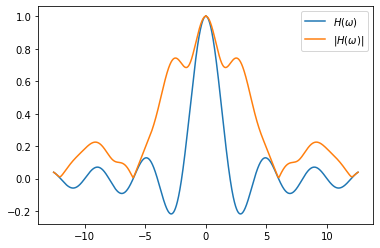

In [234]:
H = (1-np.cos(w*T))/(1j*w*T) +np.sinc((w*T)/2)

plt.plot(w,H,label='$H(\omega)$')
plt.plot(w,np.abs(H), label='$|H(\omega)|$')
plt.legend();